In [89]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [90]:
df = pd.read_csv('day.csv')

In [91]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [92]:
df.shape

(731, 16)

In [93]:
# Data type
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [94]:
#Rename the columns
df.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

In [95]:
df.nunique()

rec_id               731
datetime             731
season                 4
year                   2
month                 12
holiday                2
weekday                7
workingday             2
weather_condition      3
temp                 499
atemp                690
humidity             595
windspeed            650
casual               606
registered           679
total_count          696
dtype: int64

In [96]:
#Type casting the datetime and numerical attributes to category

df['datetime']=pd.to_datetime(df.datetime)

df['season']=df.season.astype('category')
df['year']=df.year.astype('category')
df['month']=df.month.astype('category')
df['holiday']=df.holiday.astype('category')
df['weekday']=df.weekday.astype('category')
df['workingday']=df.workingday.astype('category')
df['weather_condition']=df.weather_condition.astype('category')

In [97]:
#Summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rec_id,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896
humidity,731.0,0.627894,0.142429,0.000000,0.520000,0.626667,0.730209,0.972500
windspeed,731.0,0.190486,0.077498,0.022392,0.134950,0.180975,0.233214,0.507463
casual,731.0,848.176471,686.622488,2.000000,315.500000,713.000000,1096.000000,3410.000000
registered,731.0,3656.172367,1560.256377,20.000000,2497.000000,3662.000000,4776.500000,6946.000000
total_count,731.0,4504.348837,1937.211452,22.000000,3152.000000,4548.000000,5956.000000,8714.000000


In [98]:
#Missing values in dataset
df.isnull().sum()

rec_id               0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

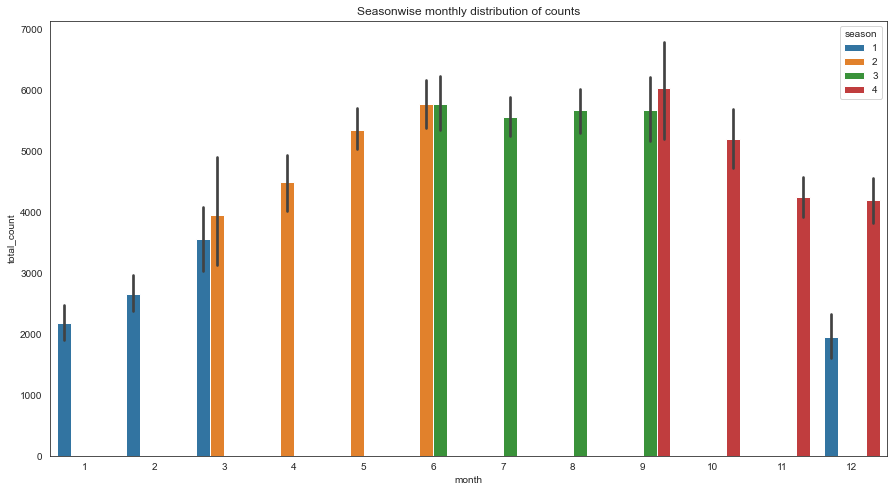

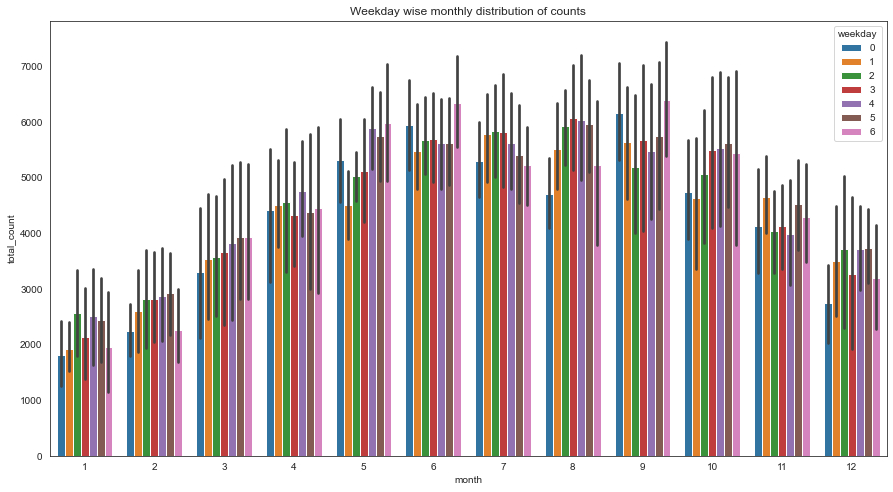

In [99]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month',y='total_count',data=df[['month','total_count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='total_count',data=df[['month','total_count','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()

In [100]:
# From the above plots, we can observed that increasing the bike rental count in springe and summer season and
# then decreasing the bike rental count in fall and winter season. Here,

# season 1-> spring season 2 -> summer season 3 -> fall season 4 -> winter

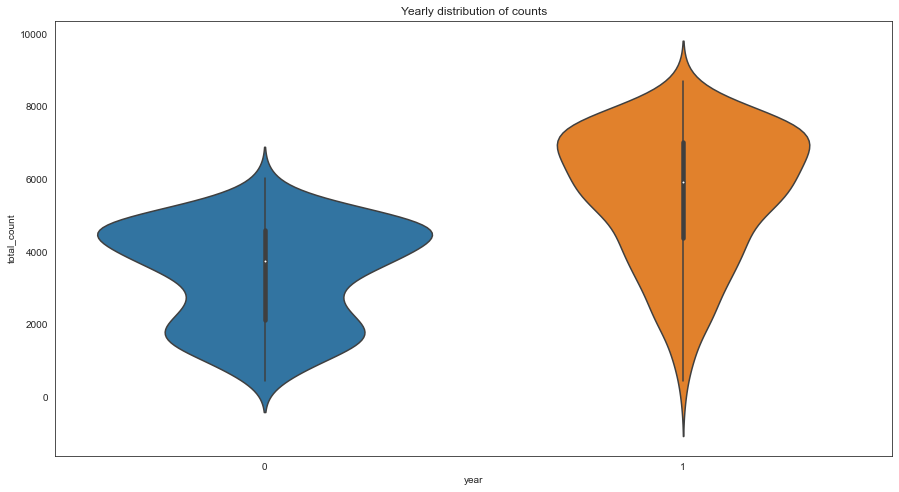

In [101]:
fig,ax=plt.subplots(figsize=(15,8))
#Violin plot for yearly distribution of counts
sns.violinplot(x='year',y='total_count',data=df[['year','total_count']])
ax.set_title('Yearly distribution of counts')
plt.show()

In [102]:
# From the violin plot, we can observed that the bike rental count distribution is highest in year 2012 then in year 2011.

# Here, year 0-> 2011, year 1-> 2012

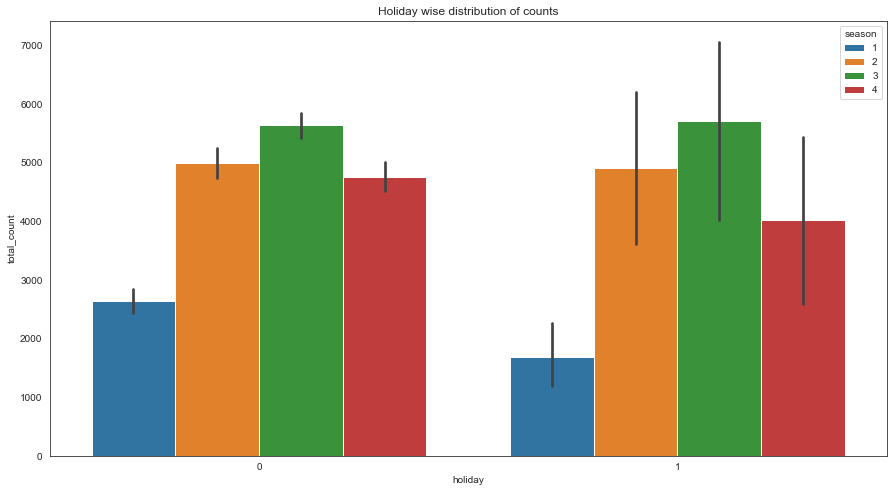

In [103]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=df,x='holiday',y='total_count',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

In [104]:
#From the above bar plot, we can observed that during no holiday the bike rental counts is highest compared to during holiday for different seasons.

#Here, 0->No holiday, 1-> holiday

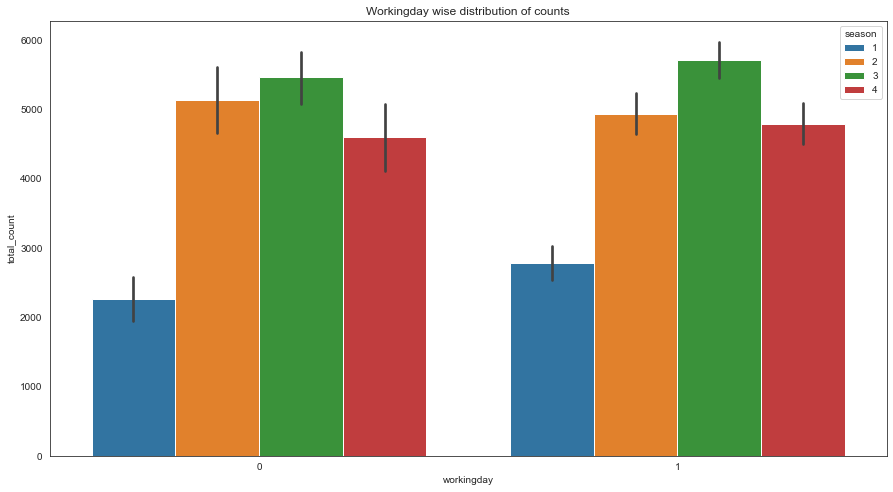

In [105]:
fig,ax=plt.subplots(figsize=(15,8))
#Bar plot for workingday distribution of counts
sns.barplot(data=df,x='workingday',y='total_count',hue='season')
ax.set_title('Workingday wise distribution of counts')
plt.show()

In [106]:
# From the above bar plot, we can observed that during workingday the bike rental counts is quite highest
#compared to during no workingday for different seasons.

# Here, 0-> No workingday, 1-> workingday

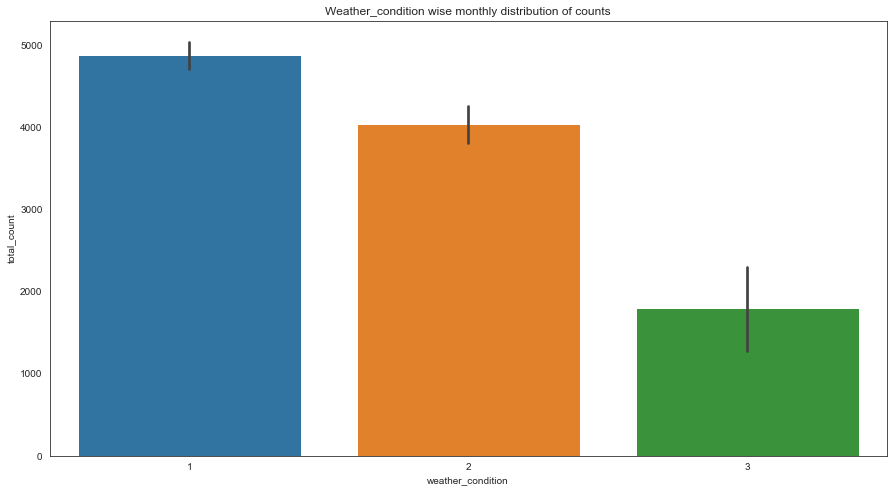

In [107]:
fig,ax1=plt.subplots(figsize=(15,8))
#Bar plot for weather_condition distribution of counts
sns.barplot(x='weather_condition',y='total_count',data=df[['month','total_count','weather_condition']],ax=ax1)
ax1.set_title('Weather_condition wise monthly distribution of counts')
plt.show()

In [108]:
# From the above bar plot, we can observed that during clear,partly cloudy weather the bike rental count is highest
# and the second highest is during mist cloudy weather and followed by third highest during light snow and
# light rain weather.

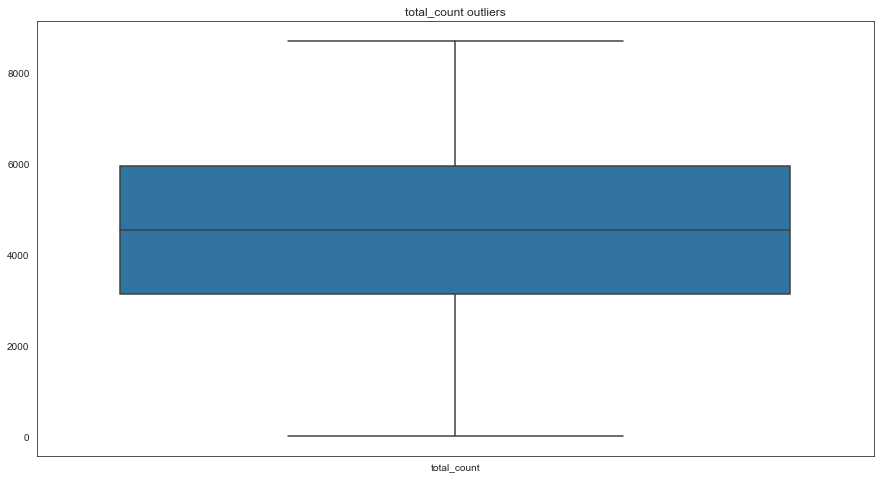

In [109]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for total_count outliers
sns.boxplot(data=df[['total_count']])
ax.set_title('total_count outliers')
plt.show()

In [110]:
# From the box plot, we can observed that no outliers are present in total_count variable.

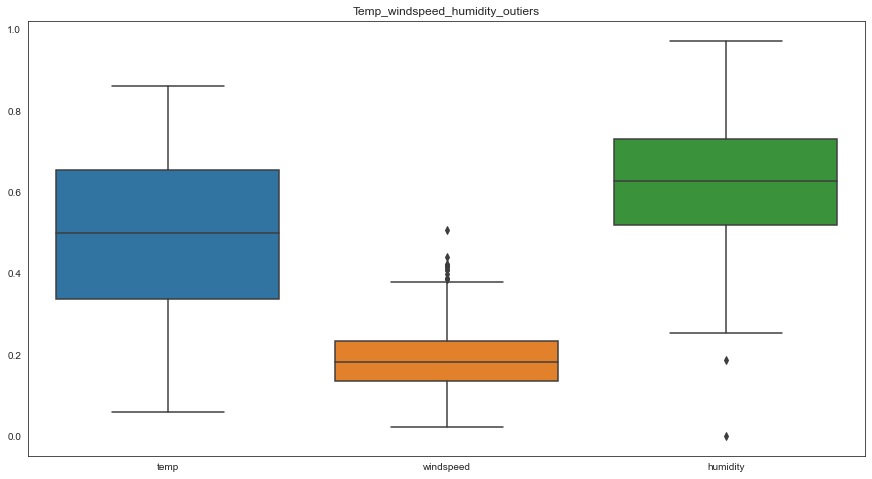

In [111]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=df[['temp','windspeed','humidity']])
ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()

In [112]:
# From the box plot, we can observed that no outliers are present in normalized temp but few outliers are present
# in normalized windspeed and humidity variable.

In [113]:
from fancyimpute import KNN

#create dataframe for outliers
wind_hum=pd.DataFrame(df,columns=['windspeed','humidity'])
 #Cnames for outliers                     
cnames=['windspeed','humidity']       
                      
for i in cnames:
    q75,q25=np.percentile(wind_hum.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25 #Inter quantile range
    min=q25-(iqr*1.5) #inner fence
    max=q75+(iqr*1.5) #outer fence
    wind_hum.loc[wind_hum.loc[:,i]<min,:i]=np.nan  #Replace with NA
    wind_hum.loc[wind_hum.loc[:,i]>max,:i]=np.nan  #Replace with NA
#Imputating the outliers by mean Imputation
wind_hum['windspeed']=wind_hum['windspeed'].fillna(wind_hum['windspeed'].mean())
wind_hum['humidity']=wind_hum['humidity'].fillna(wind_hum['humidity'].mean())

In [114]:
#Replacing the imputated windspeed
df['windspeed']=df['windspeed'].replace(wind_hum['windspeed'])
#Replacing the imputated humidity
df['humidity']=df['humidity'].replace(wind_hum['humidity'])
df.head(5)

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [115]:
# Normal Probability Plot

# Normal probability plot is a graphical technique to identify substantive departures from normality and also it tells about goodness of fit.

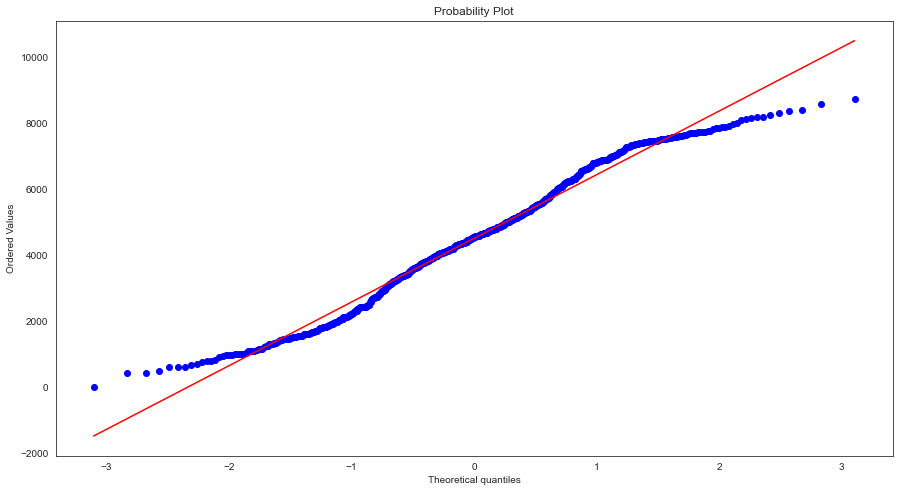

In [116]:
import scipy
from scipy import stats
#Normal plot
fig=plt.figure(figsize=(15,8))
stats.probplot(df.total_count.tolist(),dist='norm',plot=plt)
plt.show()

In [117]:
# The above probability plot, the some target variable data points are deviates from normality.

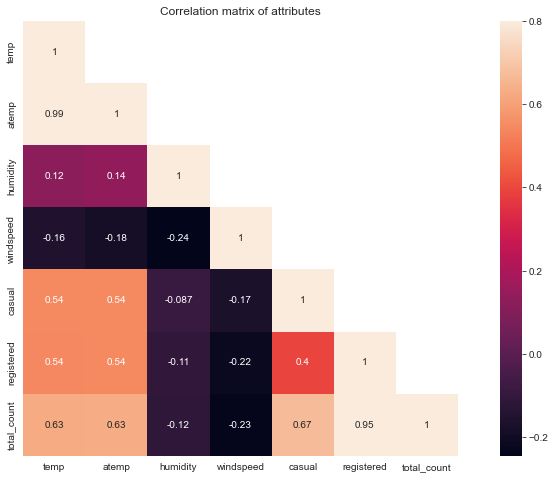

In [118]:
#Create the correlation matrix
correMtr=df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

In [119]:
# From correlation plot, we can observed that some features are positively correlated or
# some are negatively correlated to each other. 
# The temp and atemp are highly positively correlated to each other, it means that both are carrying same information.
# The total_count,casual and registered are highly positively correlated to each other.
# So, we are going to ignore atemp,casual and registered variable for further analysis.

In [120]:
#load the required libraries
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [121]:
#Split the dataset into the train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:-3],df.iloc[:,-1],test_size=0.3, random_state=42)

#Reset train index values
X_train.reset_index(inplace=True)
y_train=y_train.reset_index()

# Reset train index values
X_test.reset_index(inplace=True)
y_test=y_test.reset_index()

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(y_train.head())
print(y_test.head())

(511, 14) (220, 14) (511, 2) (220, 2)
   index  total_count
0    223         4905
1    684         5445
2    685         5698
3    163         5020
4    394         3624
   index  total_count
0    703         6606
1     33         1550
2    300         3747
3    456         6041
4    633         7538


### Split the features into categorical and numerical features

In [122]:
#Create a new dataset for train attributes
train_attributes=X_train[['season','month','year','weekday','holiday','workingday','weather_condition','humidity','temp','windspeed']]
#Create a new dataset for test attributes
test_attributes=X_test[['season','month','year','weekday','holiday','workingday','humidity','temp','windspeed','weather_condition']]
#categorical attributes
cat_attributes=['season','holiday','workingday','weather_condition','year']
#numerical attributes
num_attributes=['temp','windspeed','humidity','month','weekday']

In [123]:
#To get dummy variables to encode the categorical features to numeric
train_encoded_attributes=pd.get_dummies(train_attributes,columns=cat_attributes)
print('Shape of transfomed dataframe::',train_encoded_attributes.shape)
train_encoded_attributes.head(5)

Shape of transfomed dataframe:: (511, 18)


,month,weekday,humidity,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,8,5,0.415000,0.708333,0.125621,0,0,1,0,1,0,0,1,1,0,0,1,0
1,11,4,0.620417,0.321667,0.152987,0,0,0,1,1,0,0,1,0,1,0,0,1
2,11,5,0.524583,0.345000,0.171025,0,0,0,1,1,0,0,1,1,0,0,0,1
3,6,1,0.494583,0.635000,0.305350,0,1,0,0,1,0,0,1,1,0,0,1,0
4,1,1,0.400833,0.269167,0.215792,1,0,0,0,1,0,0,1,1,0,0,0,1


In [124]:
#Training dataset for modelling
X_train=train_encoded_attributes
y_train=y_train.total_count.values

## Linear Regression Model

In [125]:
#training model
lr_model=linear_model.LinearRegression()
lr_model


LinearRegression()

In [126]:
#fit the trained model
lr_model.fit(X_train,y_train)

LinearRegression()

In [127]:
#Accuracy of the model
lr=lr_model.score(X_train,y_train)
print('Accuracy of the model :',lr)
print('Model coefficients :',lr_model.coef_)
print('Model intercept value :',lr_model.intercept_)

Accuracy of the model : 0.8165025087335218
Model coefficients : [  -25.40093273    69.00041734 -1021.83801516  5265.83269167
 -2556.15204574  -949.34444399   229.82675107   -79.72789531
   799.24558823   228.48467064  -228.48467064   -78.95445063
    78.95445063   761.85445399   252.23446226 -1014.08891625
  -989.30080604   989.30080604]
Model intercept value : 2195.310562348838


In [128]:
#Cross validation prediction
predict=cross_val_predict(lr_model,X_train,y_train,cv=3)
predict

array([ 5248.7578435 ,  5038.5615668 ,  5806.79339316,  4353.94868702,
        3738.02165465,  6781.13199665,  6258.53686563,  3802.32154757,
        4679.69060739,  3413.26938345,  5382.26926795,  3103.26413427,
        4340.14502978,  5792.02135524,  4357.90482085,  6307.47067538,
        4382.53420011,  3356.51602988,   722.55880035,   542.99629923,
        7419.07107033,  3747.2639444 ,  5282.38323084,  5494.01243603,
        6941.05375802,  7322.95928003,  3629.5886932 ,  3571.12912785,
         985.45343201,  4884.05952005,  1644.73801661,  1708.88196943,
        1689.90104258,  1295.63879625,  4891.47726849,  5507.81236621,
        6015.17425095,  4180.63057735,  5075.38404498,  5941.56769703,
        6400.40498745,  4215.81855312,  5962.38814912,  6052.71452714,
        3345.73314148,  4096.72004817,  1465.44713372,  3603.17274178,
        4587.89942466,  6650.65699064,  1719.93360965,  6128.15135134,
        6439.33525805,  3277.84008997,  4592.0786174 ,  3194.61235   ,
      

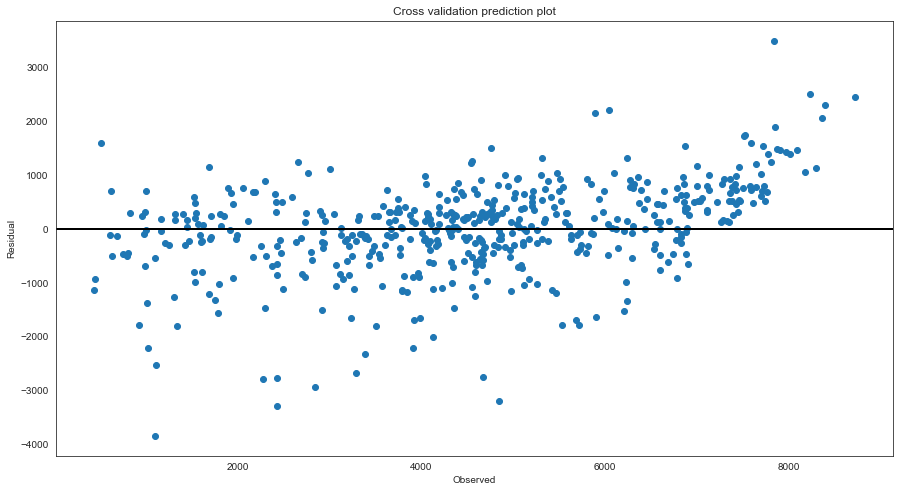

In [129]:
#Cross validation plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [130]:
# Cross validation prediction plot tells about finite variance between actual target value and predicted target value.
# In this plot, some data points are have same finite variance between them and for some are not have it.

### R-squared and mean squared error score

In [131]:
#R-squared scores
r2_scores = cross_val_score(lr_model, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.7995611885231044


In [132]:
# The R-squared or coefficient of determination is 0.80 on average for 3-fold cross validation ,
# it means that predictor is only able to predict 80% of the variance in the target variable 
# which is contributed by independent variables.

#### Decoding the test attributes

In [133]:
#To get dummy variables to encode the categorical features to numeric
test_encoded_attributes=pd.get_dummies(test_attributes,columns=cat_attributes)
print('Shape of transformed dataframe :',test_encoded_attributes.shape)
test_encoded_attributes.head(5)

Shape of transformed dataframe : (220, 18)


,month,weekday,humidity,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,12,2,0.733750,0.475833,0.174129,0,0,0,1,1,0,0,1,1,0,0,0,1
1,2,4,0.437826,0.186957,0.277752,1,0,0,0,1,0,0,1,1,0,0,1,0
2,10,5,0.585833,0.330833,0.229479,0,0,0,1,1,0,0,1,0,1,0,1,0
3,4,0,0.676250,0.425833,0.172267,0,1,0,0,1,0,1,0,0,1,0,0,1
4,9,2,0.570000,0.550000,0.236321,0,0,0,1,1,0,0,1,1,0,0,0,1


In [134]:
#Test dataset for prediction
X_test=test_encoded_attributes
y_test=y_test.total_count.values

In [135]:
#predict the model
lr_pred=lr_model.predict(X_test)
lr_pred

array([6197.12329782, 1378.27938018, 3212.82326914, 4825.6058012 ,
       6672.2308762 , 6942.2039349 ,  693.99373527, 1929.80808599,
       6981.48110092, 6844.67173725, 2798.54559266, 2121.8457389 ,
       4465.68268321, 5486.74428544, 2189.59008463, 1827.67433934,
       2173.48158771, 7469.58027211, 5500.15015098, 2608.49336522,
       6933.20124884, 7837.10306473, 5532.48547104, 1261.13929139,
       1245.46616862, 4479.83361908, 2496.61989036, 6733.37234742,
       3854.86011528, 5802.97615092, 3103.90712661, 4252.34563973,
       6358.26561572, 6798.3144729 , 5790.26253638, 5402.54802544,
       6692.75313381, 5848.44121572, 3180.98457936,  805.80292438,
       4497.72178336, 3746.59014984, 6903.03554988, 4077.94155535,
       6907.0442079 , 1687.7942605 , 4801.49297945, 4723.9530173 ,
       6369.39948476, 4579.39869385, 3105.76669461, 2833.81705416,
       1829.36260472, 5601.65932265, 4625.78263028, 4089.39223053,
       4695.03945324, 3038.41700558, 4351.67190815, 6630.97204

### Root mean square error and mean absolute error scores

In [136]:
import math
#Root mean square error 
rmse=math.sqrt(metrics.mean_squared_error(y_test,lr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,lr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 783.0616972625061
Mean absolute error : 594.7368430236426


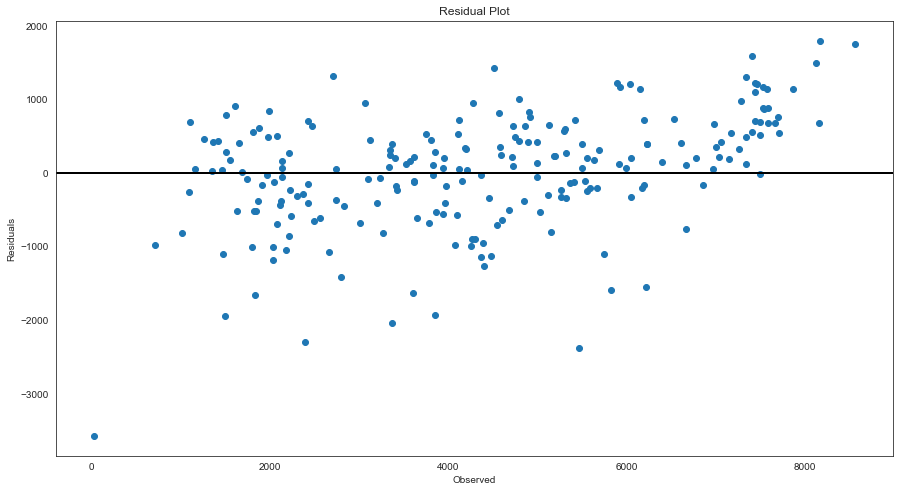

In [137]:
#Residual plot
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, y_test-lr_pred)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
plt.show()

In [138]:
# Residual plot tells about finite variance between actual target value and predicted target value.
# In this plot,very less data points are have same finite variance between them and for most are not have it.

## Decision tree regressor

In [139]:
#training the model
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

In [140]:
#Fit the trained model
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

In [141]:
#Accuracy score of the model
dtr_score=dtr.score(X_train,y_train)
print('Accuracy of model :',dtr_score)

Accuracy of model : 0.8082151777539757


In [142]:
predict=cross_val_predict(dtr,X_train,y_train,cv=3)
predict

array([4513.38554217, 4592.56521739, 4592.56521739, 4513.38554217,
       2558.6       , 5388.47058824, 6824.96969697, 4592.56521739,
       4592.56521739, 3603.92857143, 6824.96969697, 3194.22222222,
       4513.38554217, 6824.96969697, 4513.38554217, 6824.96969697,
       3603.92857143, 1636.81818182, 1636.81818182, 1636.81818182,
       6824.96969697, 2558.6       , 4592.56521739, 1027.        ,
       6824.96969697, 6824.96969697, 2558.6       , 4592.56521739,
       1636.81818182, 4513.38554217, 1636.81818182, 1636.81818182,
       1636.81818182, 1636.81818182, 4513.38554217, 5388.47058824,
       6824.96969697, 4592.56521739, 4513.38554217, 6824.96969697,
       6824.96969697, 4513.38554217, 6824.96969697, 6824.96969697,
       4513.38554217, 3194.22222222, 1636.81818182, 4592.56521739,
       4513.38554217, 6824.96969697, 3194.22222222, 6824.96969697,
       6824.96969697, 3603.92857143, 4513.38554217, 1027.        ,
       1636.81818182, 4513.38554217, 1636.81818182, 4513.38554

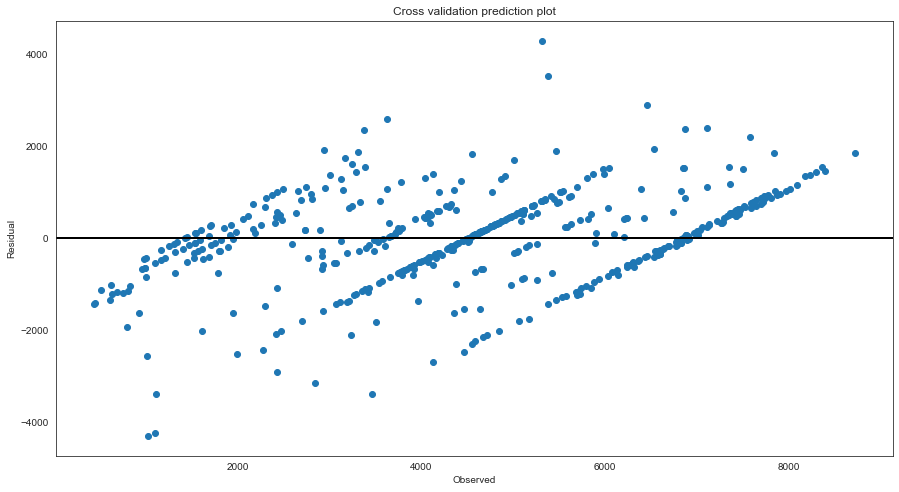

In [143]:
# Cross validation prediction plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [144]:
# Cross validation prediction plot tells about finite variance between actual target value and predicted target value. 
# In this plot,some data points are have same finite variance between them and for some are not have it.

In [145]:
#R-squared scores
r2_scores = cross_val_score(dtr, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.7294133148789058


In [146]:
#The R-squared or coefficient of determination is 0.74 on average for 3-fold cross validation, 
#it means that predictor is only able to predict 74% of the variance in the target variable
#which is contributed by independent variables.

In [147]:
# Model performance on test dataset

#predict the model
dtr_pred=dtr.predict(X_test)
dtr_pred

array([6777.95      , 1848.95454545, 3612.69230769, 5277.09375   ,
       6777.95      , 6777.95      , 1848.95454545, 1992.25      ,
       6777.95      , 6777.95      , 1848.95454545, 1992.25      ,
       4465.04444444, 5277.09375   , 1992.25      , 1992.25      ,
       1992.25      , 6777.95      , 4465.04444444, 1848.95454545,
       6777.95      , 6777.95      , 5277.09375   , 1848.95454545,
       1992.25      , 4465.04444444, 1992.25      , 6777.95      ,
       1848.95454545, 5277.09375   , 1848.95454545, 4465.04444444,
       6777.95      , 6777.95      , 6777.95      , 5484.22727273,
       6777.95      , 6777.95      , 4465.04444444, 1848.95454545,
       4465.04444444, 1848.95454545, 6777.95      , 4465.04444444,
       6777.95      , 3612.69230769, 4465.04444444, 6777.95      ,
       6777.95      , 5484.22727273, 4465.04444444, 1848.95454545,
       1992.25      , 4465.04444444, 4465.04444444, 4465.04444444,
       3170.41666667, 4465.04444444, 4465.04444444, 6777.95   

In [148]:
#Root mean square error
rmse=math.sqrt(metrics.mean_squared_error(y_test,dtr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,dtr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 925.7976022448886
Mean absolute error : 667.8169018859927


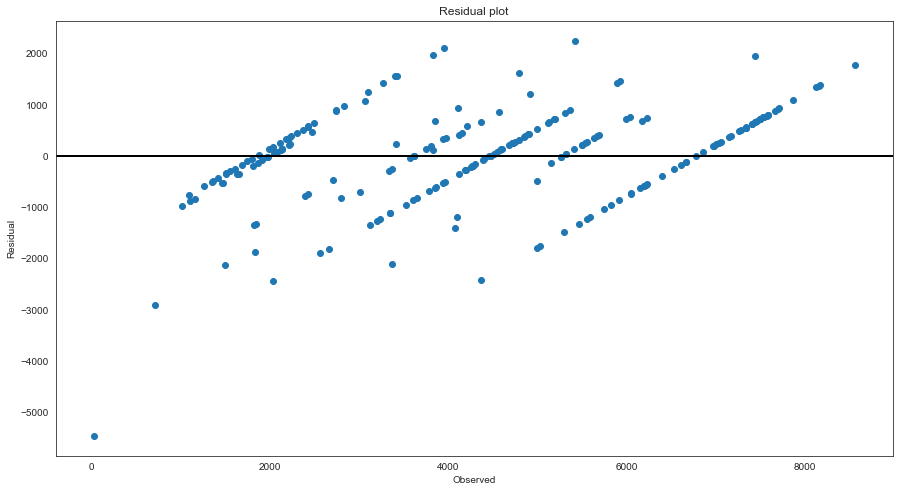

In [149]:
#Residual scatter plot
residuals = y_test-dtr_pred
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.set_title('Residual plot')
plt.show()

In [150]:
#Residual plot tells about finite variance between actual target value and predicted target value.
#In this plot, some data points are have same finite variance between them and for some are not have it.

## Random Forest

In [151]:
#Training the model
from sklearn.ensemble import RandomForestRegressor
X_train=train_encoded_attributes
rf=RandomForestRegressor(n_estimators=200)

In [152]:
#Fit the trained model
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [153]:
#accuracy of the model
rf_score =rf.score(X_train,y_train)
print('Accuracy of the model :',rf_score)

Accuracy of the model : 0.980998733633333


In [154]:
#Cross validation prediction
predict=cross_val_predict(rf,X_train,y_train,cv=3)
predict

array([4979.245, 4718.98 , 5324.59 , 4781.145, 2970.705, 5621.   ,
       6564.68 , 3845.7  , 4313.19 , 3640.835, 6024.35 , 3347.215,
       4213.405, 7055.26 , 4971.965, 6551.28 , 4070.505, 2669.9  ,
       1143.985, 1369.08 , 6211.375, 3480.3  , 4631.34 , 4508.42 ,
       7163.95 , 6261.61 , 3201.37 , 4094.05 , 1398.01 , 4976.82 ,
       1016.905, 1836.98 , 1476.49 , 2006.94 , 4722.285, 4899.72 ,
       6819.28 , 4013.03 , 4305.695, 6071.745, 6634.705, 4406.04 ,
       7235.32 , 6481.685, 4436.585, 3456.435, 1294.74 , 4098.785,
       4707.165, 6571.635, 2859.755, 6523.845, 6508.585, 3335.92 ,
       4908.465, 3130.785, 1382.84 , 4062.11 , 1040.705, 4613.8  ,
       5297.325, 4103.6  , 3609.015, 5433.82 , 4354.84 , 6995.04 ,
       4496.675, 3259.19 , 3733.335, 4180.61 , 3536.965, 4443.415,
       7213.005, 3806.5  , 5001.88 , 2420.515, 2524.3  , 4568.215,
       2096.245, 4321.38 , 4325.325, 4711.6  , 4132.505, 2169.215,
       7601.465, 4292.875, 4738.505, 7303.77 , 4585.42 , 4161.

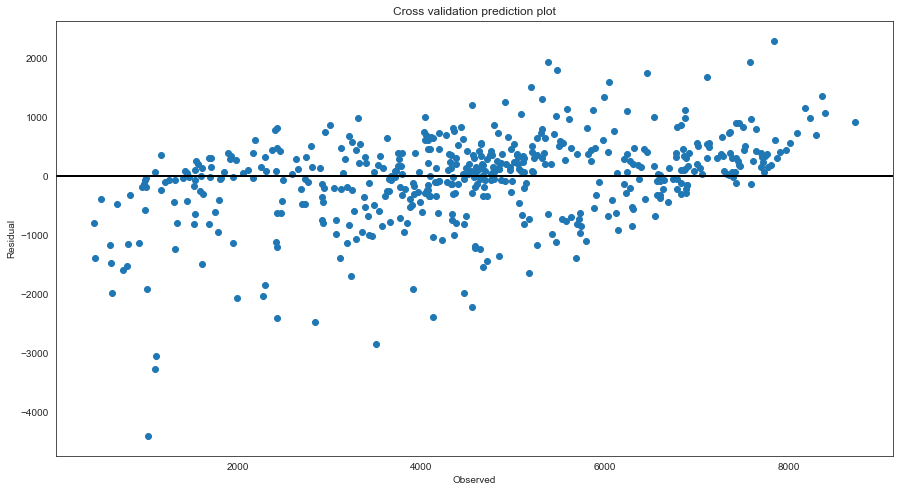

In [155]:
#Cross validation prediction plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [156]:
# Cross validation prediction plot tells about finite variance between actual target value and predicted target value.
#In this plot,some data points are have same finite variance between them and for some are not have it.

In [157]:
#R-squared scores
r2_scores = cross_val_score(rf, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.8491483855222306


In [158]:
#The R-squared or coefficient of determination is 0.85 on average for 3-fold cross validation ,
#it means that predictor is only able to predict 85% of the variance in the target variable
#which is contributed by independent variables.

In [159]:
#predict the model
X_test=test_encoded_attributes
rf_pred=rf.predict(X_test)
rf_pred

array([6637.04 , 1526.085, 3448.4  , 5030.6  , 7510.13 , 7248.14 ,
       1478.825, 2309.7  , 7280.585, 6376.385, 2101.195, 2897.29 ,
       4958.08 , 4949.2  , 2122.725, 2037.88 , 2266.155, 7854.405,
       4989.115, 2499.715, 7427.625, 6094.74 , 5902.16 , 1766.84 ,
       1699.215, 4679.73 , 1910.69 , 7231.77 , 3187.155, 5657.095,
       3050.525, 4055.44 , 6556.395, 7354.17 , 6126.645, 5168.54 ,
       7165.61 , 6226.315, 3076.92 ,  906.65 , 3878.605, 3283.425,
       7235.255, 4452.905, 6969.   , 2301.33 , 4354.93 , 5637.12 ,
       6597.25 , 4290.535, 4201.645, 3020.76 , 2285.145, 4373.05 ,
       4577.855, 4204.56 , 3521.675, 3691.65 , 4290.515, 6555.8  ,
       6225.185, 6742.335, 1948.   , 7328.95 , 6477.935, 6446.44 ,
       5917.14 , 4363.675, 1747.135, 7378.23 , 3648.97 , 2142.775,
       3184.76 , 4116.96 , 4330.295, 3852.54 , 4573.315, 4515.22 ,
       1350.085, 4348.255, 2437.81 , 1953.865, 5013.95 , 4200.845,
       3680.565, 3304.65 , 4207.265, 3757.005, 3485.23 , 3372.

In [160]:
#Root mean square error
rmse = math.sqrt(metrics.mean_squared_error(y_test,rf_pred))
print('Root mean square error :',rmse)
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,rf_pred)
print('Mean absolute error :',mae)

Root mean square error : 638.1740631892682
Mean absolute error : 428.309909090909


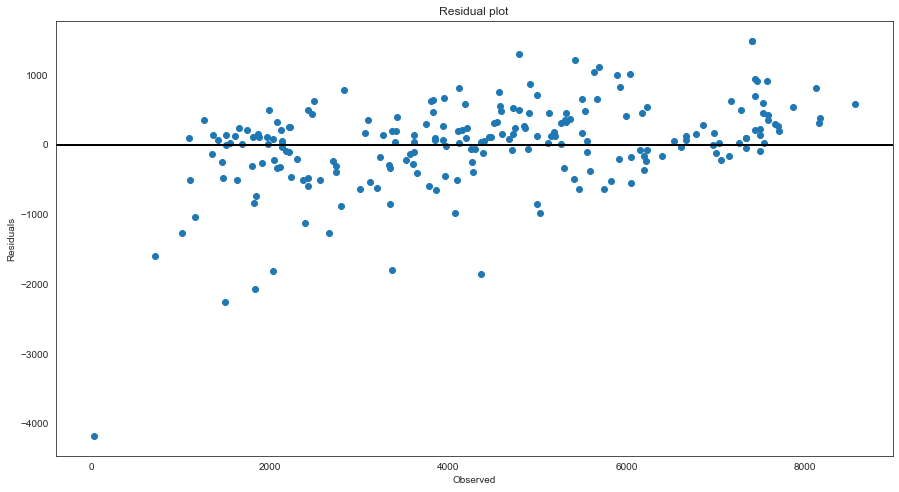

In [161]:
#Residual scatter plot
fig, ax = plt.subplots(figsize=(15,8))
residuals=y_test-rf_pred
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.set_title('Residual plot')
plt.show()

In [162]:
#Cross validation prediction plot tells about finite variance between actual target value and predicted target value.
#In this plot,some data points are have same finite variance between them and for some are not have it.

In [163]:
# When we compare the root mean squared error and mean absolute error of all 3 models,
# the random forest model has less root mean squared error and mean absolute error.
# So, finally random forest model is bset for predicting the bike rental count on daily basis

In [164]:
df.head()

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [165]:
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

In [168]:
df.head()

,rec_id,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
datetime,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


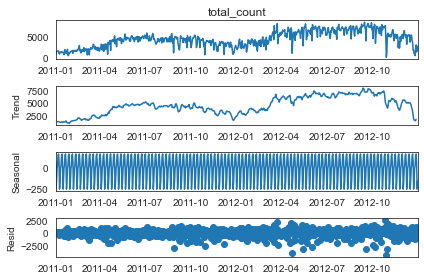

In [170]:
result = seasonal_decompose(df['total_count'])
result.plot();

### Test for stationarity

In [171]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [172]:
adf_test(df['total_count'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -1.877448
p-value                   0.342743
# lags used              13.000000
# observations          717.000000
critical value (1%)      -3.439503
critical value (5%)      -2.865579
critical value (10%)     -2.568921
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [173]:
df_stationary = df.diff().dropna()

In [174]:
adf_test(df_stationary['total_count'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.177881e+01
p-value                 1.046780e-21
# lags used             1.200000e+01
# observations          7.170000e+02
critical value (1%)    -3.439503e+00
critical value (5%)    -2.865579e+00
critical value (10%)   -2.568921e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


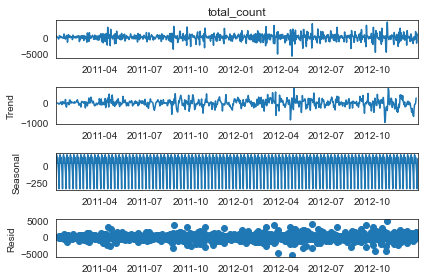

In [175]:
result = seasonal_decompose(df_stationary['total_count'])
result.plot();

<AxesSubplot:xlabel='datetime'>

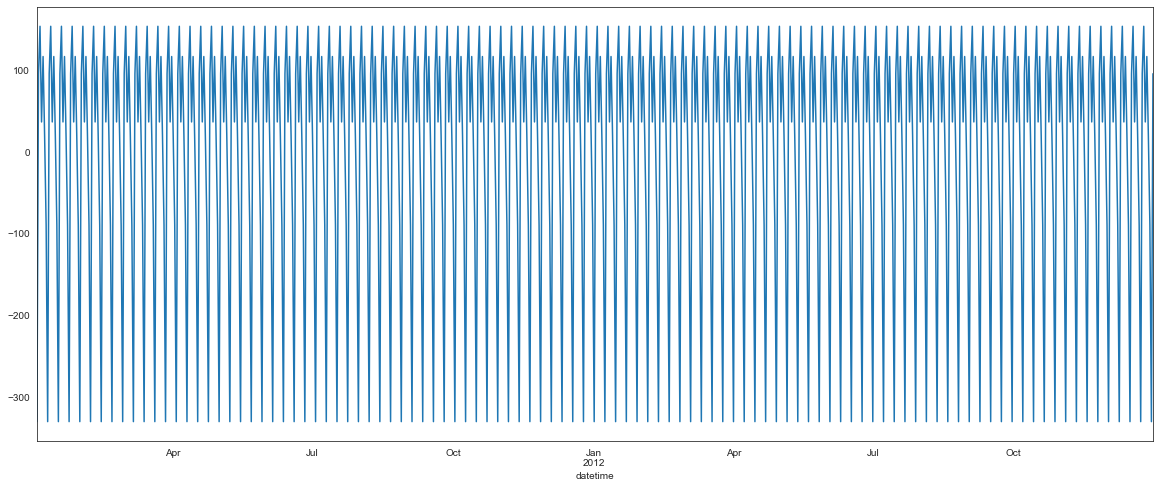

In [178]:
result.seasonal.plot(figsize=(20,8))

In [ ]:
# For SARIMA Orders we set seasonal=True and pass in an m value
auto_arima(df_stationary['total_count'],seasonal=True,m=7).summary()

In [180]:
# Excellent! This provides an ARIMA Order of (1,0,1) and a seasonal order of (1,0,1,7) 
# Now let's train & test the SARIMA model, evaluate it, then compare the result to a model that uses an exogenous variable.

### Split the data into train/test sets

In [181]:
len(df_stationary)

730

In [182]:
# Set four weeks for testing
train = df_stationary.iloc[:701]
test = df_stationary.iloc[701:]

### Fit a SARIMA(1,0,1)(1,0,1,7) Model

In [185]:
model = SARIMAX(train['total_count'],order=(1,0,1),seasonal_order=(1,0,1,7),enforce_invertibility=False)
results = model.fit()
results.summary()

C:\Users\KARAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\KARAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\KARAN\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                       total_count   No. Observations:                  701
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -5767.732
Date:                           Sun, 15 May 2022   AIC                          11545.465
Time:                                   13:39:18   BIC                          11568.227
Sample:                               01-02-2011   HQIC                         11554.263
                                    - 12-02-2012                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3333      0.033      9.999      0.000       0.268       0.399
ma.L1         -0.9104      0.018    -49.405      0.000      -0.947      -0.874
ar.S.L7        0.9331      0.059     15.700      0.000       0.817       1.050
ma.S.L7       -0.8840      0.077    -11.555      0.000      -1.034      -0.734
sigma2      8.179e+05   2.26e+04     36.225      0.000    7.74e+05    8.62e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              1340.58
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               3.63   Skew:                            -1.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [186]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False).rename('SARIMA(1,0,1)(1,0,1,7) Predictions')

[Text(0.5, 0, ''), Text(0, 0.5, 'Total_count')]

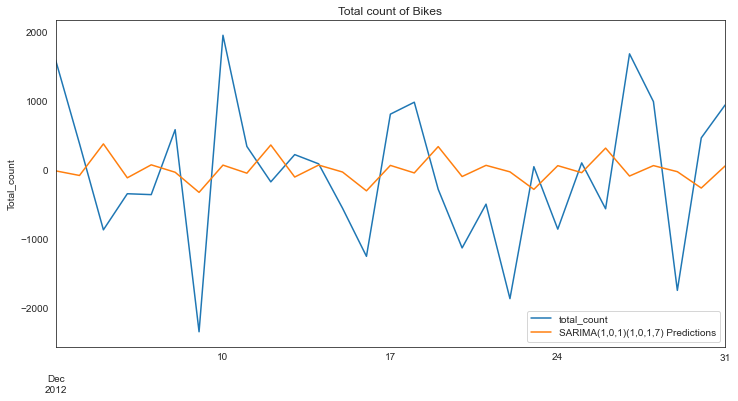

In [187]:
# Plot predictions against known values
title='Total count of Bikes'
ylabel='Total_count'
xlabel=''

ax = test['total_count'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)


In [189]:
# Evaluate the model

from statsmodels.tools.eval_measures import mse,rmse

error1 = mse(test['total_count'], predictions)
error2 = rmse(test['total_count'], predictions)

print(f'SARIMA(1,0,1)(1,0,1,7) MSE Error: {error1:11.10}')
print(f'SARIMA(1,0,1)(1,0,1,7) RMSE Error: {error2:11.10}')

SARIMA(1,0,1)(1,0,1,7) MSE Error: 1070844.282
SARIMA(1,0,1)(1,0,1,7) RMSE Error: 1034.816062


In [190]:
df_stationary.head(2)

,rec_id,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
datetime,,,,,,,,,,,,,,,
2011-01-02,1.0,0.0,0.0,0.0,0.0,-6.0,0.0,0.0,0.019311,-0.009886,-0.109746,0.088093,-200.0,16.0,-184.0
2011-01-03,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,-0.167114,-0.164334,-0.258814,-0.000230,-11.0,559.0,548.0


### Now add the exog variable

In [202]:
model = SARIMAX(train['total_count'],exog=train[['temp', 'humidity', 'weather_condition','windspeed', 'workingday', 'year', 'month','weekday','season']],order=(1,0,0),seasonal_order=(2,0,0,7),enforce_invertibility=False)
results = model.fit()
results.summary()

C:\Users\KARAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\KARAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                       total_count   No. Observations:                  701
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -5655.642
Date:                           Sun, 15 May 2022   AIC                          11337.283
Time:                                   13:57:32   BIC                          11396.466
Sample:                               01-02-2011   HQIC                         11360.159
                                    - 12-02-2012                                         
Covariance Type:                             opg                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
temp               5564.6186    476.826     11.670      0.000    4630.057    6499.180
humidity          -2783.7029    305.708     -9.106      0.000   -3382.880   -2184.526
weather_condition  -422.5125     64.209     -6.580      0.000    -548.360    -296.665
windspeed         -2545.3080    351.273     -7.246      0.000   -3233.791   -1856.825
workingday           74.2673     46.875      1.584      0.113     -17.606     166.141
year              -1449.8832   2781.195     -0.521      0.602   -6900.926    4001.159
month              -180.4263    174.110     -1.036      0.300    -521.675     160.822
weekday              60.1733     12.771      4.712      0.000      35.142      85.204
season              -44.9917    204.798     -0.220      0.826    -446.389     356.406
ar.L1                -0.3186      0.029    -11.102      0.000      -0.375      -0.262
ar.S.L7              -0.0149      0.038     -0.392      0.695      -0.090       0.060
ar.S.L14              0.0349      0.041      0.845      0.398      -0.046       0.116
sigma2             5.976e+05    2.1e+04     28.461      0.000    5.56e+05    6.39e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.64   Jarque-Bera (JB):               485.08
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):               2.60   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [203]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test[['temp', 'humidity', 'weather_condition', 'windspeed', 'workingday', 'year', 'month','weekday','season']]  # requires two brackets to yield a shape of (35,1)
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX(1,0,0)(2,0,0,7) Predictions')

[Text(0.5, 0, ''), Text(0, 0.5, 'Total count')]

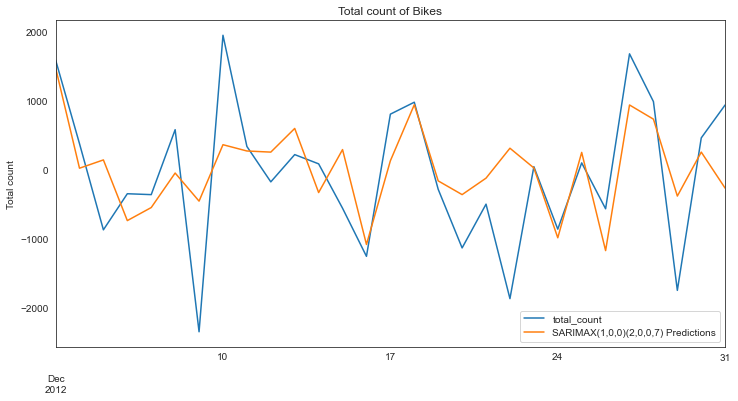

In [204]:
# Plot predictions against known values
title='Total count of Bikes'
ylabel='Total count'
xlabel=''

ax = test['total_count'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [205]:

error1x = mse(test['total_count'], predictions)
error2x = rmse(test['total_count'], predictions)

# Print new SARIMAX values
print(f'SARIMAX(1,0,0)(2,0,0,7) MSE Error: {error1x:11.10}')
print(f'SARIMAX(1,0,0)(2,0,0,7) RMSE Error: {error2x:11.10}')

SARIMAX(1,0,0)(2,0,0,7) MSE Error: 670671.7183
SARIMAX(1,0,0)(2,0,0,7) RMSE Error: 818.9454917
